In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_regression

# Autoreload of the files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
path = '/Users/gaspardvilla/Local/NAT/nat_ada/data'

# Load dataset
data = pd.read_csv(f'{path}/knn_dataset.csv')
random_state = 4

# 1 - Quick EDA
***

**Question :** Visualize your data set in a proper way.

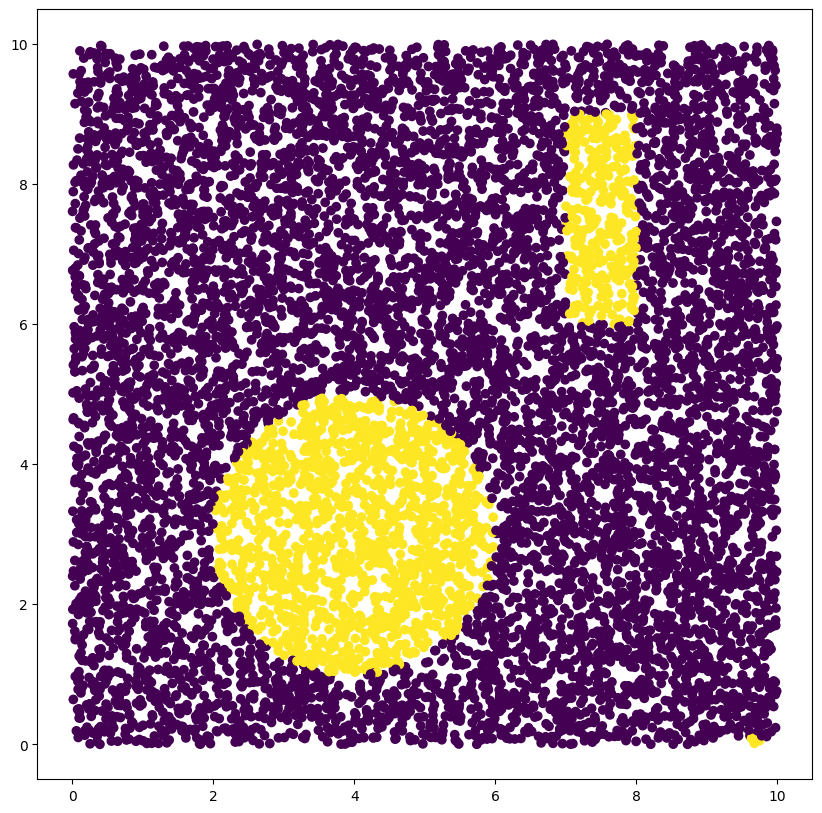

In [33]:
# Visualization
plt.figure(figsize=(10,10))
plt.scatter(data['coord_x'], data['coord_y'], c=data['target'], cmap='viridis')
plt.show()


**Question :** Split your data set into train, validation and test sets. (PS: there is a function in sklearn doing it for you).

In [36]:
# Train a K-mean model on the predicted values of the full set with target value equal to 1
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=random_state, init = [[4, 3], [8, 8], [10, 0]])
# kmeans = KMeans(n_clusters=3, random_state=random_state)
kmeans.fit(data[data.target == 1][['coord_x', 'coord_y']])

# Add the cluster labels to the data set
data['cluster'] = kmeans.predict(data[['coord_x', 'coord_y']])
data.loc[data.target == 0, 'cluster'] = -1

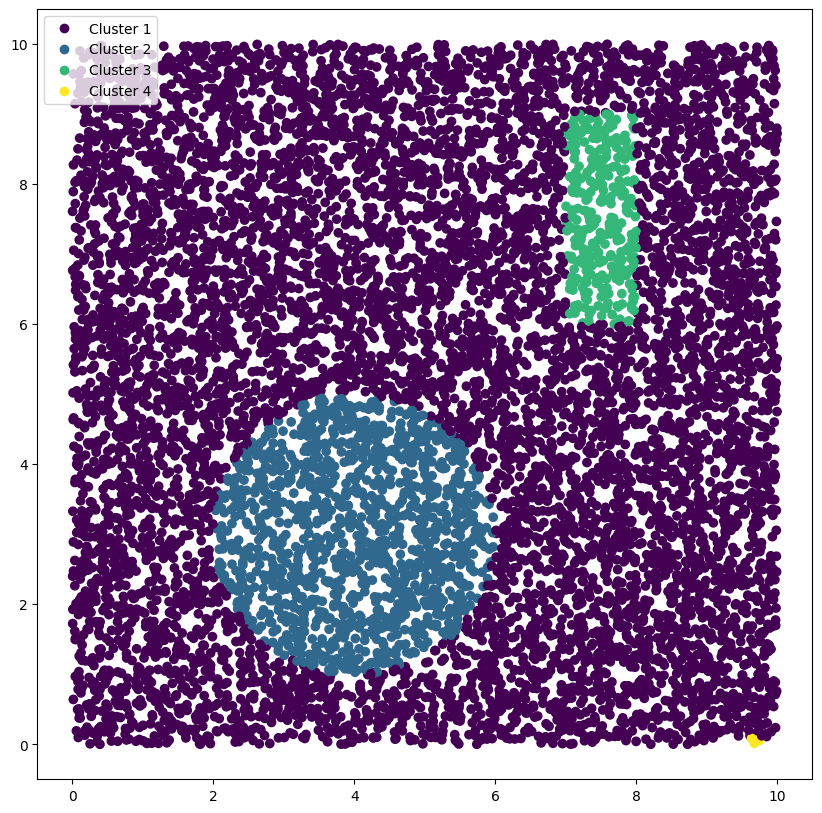

In [37]:
# Visualization
plt.figure(figsize=(10,10))
scatter = plt.scatter(data['coord_x'], data['coord_y'], c=data['cluster'], cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.show()

In [20]:
print(data[(data.coord_y < 0.1) & (data.target == 1)])

       coord_x   coord_y  target  cluster
1535  9.748725  0.052296     1.0        2
2545  9.676471  0.014738     1.0        2
6187  9.636872  0.084956     1.0        2
6587  9.722214  0.070965     1.0        2
9120  9.718471  0.056313     1.0        2


In [26]:
# Split your data set in train, validation and test sets
from sklearn.model_selection import train_test_split

X = data[['coord_x', 'coord_y', 'cluster']]
y = data['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=data.cluster)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=random_state, stratify=X_train.cluster)


print(len(X_train[(X_train.coord_y < 0.1) & y_train == 1]))
print(len(X_val[(X_val.coord_y < 0.1) & y_val == 1]))
print(len(X_test[(X_test.coord_y < 0.1) & y_test == 1]))

3
1
1


In [27]:
print(f'Train : {len(X_train)} / Validation : {len(X_val)} / Test : {len(X_test)}')

Train : 6000 / Validation : 2000 / Test : 2000


# 2 - Train a KNN model
***

**Question :** Build a KNN model using the sklearn library and the train set. Use the validation set to find the best hyperparameters. 

In [38]:
# Build and train your model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train[['coord_x', 'coord_y']], y_train)


KNeighborsClassifier(n_neighbors=3)

# 2 - Test your model
***

**Question :** Test your "best" performing model on the test set with the proper metrics.

In [39]:
from sklearn.metrics import accuracy_score

# Test your model
test_set = pd.read_csv(f'{path}/knn_testset.csv')

X_test = test_set[['coord_x', 'coord_y']]
y_test = test_set['target']

y_pred = model.predict(X_test)

# Accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))


Accuracy:  0.77


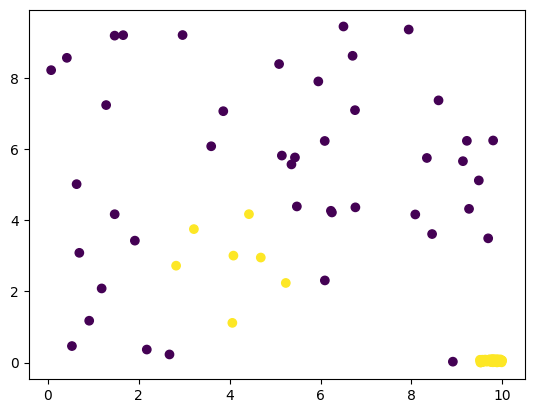

In [40]:
plt.scatter(test_set['coord_x'], test_set['coord_y'], c=test_set['target'], cmap='viridis')
plt.show()

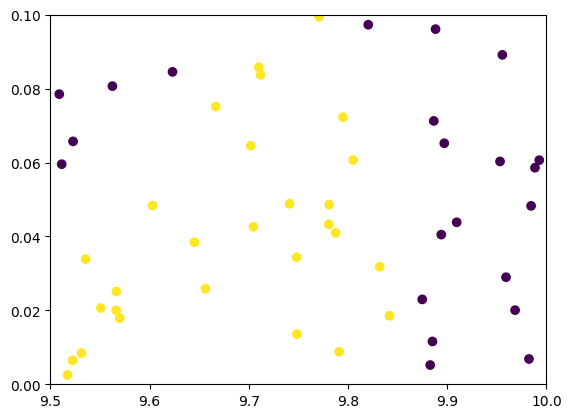

In [30]:
# Display preds
plt.scatter(X_test['coord_x'], X_test['coord_y'], c=y_pred)
plt.xlim(9.5, 10)
plt.ylim(0, 0.1)
plt.show()
